In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("uber.csv")

In [18]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.corr()

C:\Users\Ketan\AppData\Local\Temp\ipykernel_4968\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000589,0.000230,-0.000341,0.000270,0.000271,0.002257
fare_amount,0.000589,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.000230,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.000341,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002257,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


In [5]:
df.dropna(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x24a885f0ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a885f1000>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a885f0820>],
 'medians': [<matplotlib.lines.Line2D at 0x24a885f1540>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a885f17e0>],
 'means': []}

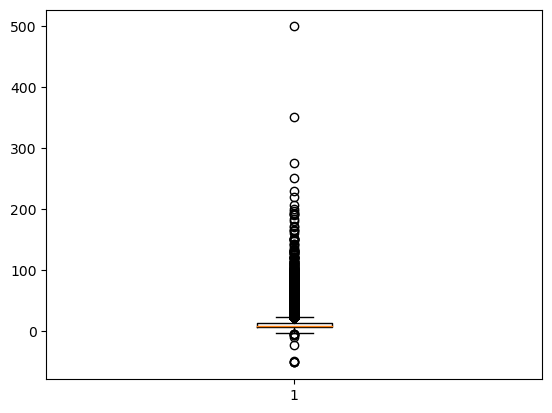

In [6]:
plt.boxplot(df['fare_amount'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.drop(["key","pickup_datetime", "Unnamed: 0",], axis=1, inplace=True)
x = df.drop("fare_amount", axis = 1)
y = df['fare_amount']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_test.iloc[0])

pickup_longitude    -73.961287
pickup_latitude      40.771617
dropoff_longitude   -73.974797
dropoff_latitude     40.761457
passenger_count       1.000000
Name: 54458, dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [14]:
pr_input = input("Enter a list of numerical values separated by commas: ")

# Convert the user input string to a list of floats
pr = [float(x) for x in pr_input.split(',')]


Enter a list of numerical values separated by commas: -74.007204,40.728709,-73.947355,40.778531,1


In [15]:
pr

[-74.007204, 40.728709, -73.947355, 40.778531, 1.0]

In [11]:
#Prediction
predict = lrmodel.predict(x_test)
pr = [-74.007204,40.728709,-73.947355,40.778531,1]
pr_2d = np.array(pr).reshape(1, -1)
print(lrmodel.predict(pr_2d))

[11.29795319]


C:\Users\Ketan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
#Check Error
from sklearn.metrics import mean_squared_error, r2_score
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
r2Score = r2_score(y_test, predict)
print("RMSE error for the model is ", lrmodelrmse)
print("R2 score is: ", r2Score)

RMSE error for the model is  10.004429608901047
R2 score is:  0.0002266814197819933
